In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [30]:
baseball_df = pd.read_csv('Merged_Data.csv')
baseball_df

,Unnamed: 0,join,team_id,opponent_id,league,opponent_league,division,opponent_division,team_side,date,...,pos8_int_start_distance,pos9_int_start_distance,pitcher_run_exp,run_exp,Day of week,Away score,Home score,Attendance,Duration (min),Score Line
0,NaN,3/30/2023 DH0 AZ,AZ,LAD,NL,NL,W,W,Away,3/30/2023,...,323,290,-3.7,3.7,Thu,2,8,52075,155,110000000
1,NaN,3/30/2023 DH0 ATL,ATL,WSH,NL,NL,E,E,Away,3/30/2023,...,323,299,3.8,-3.8,Thu,7,2,35756,187,030100003
2,NaN,3/30/2023 DH0 BAL,BAL,BOS,AL,AL,E,E,Away,3/30/2023,...,325,305,-2.4,2.4,Thu,10,9,36049,190,100430200
3,NaN,3/30/2023 DH0 BOS,BOS,BAL,AL,AL,E,E,Home,3/30/2023,...,324,302,-5.5,5.5,Thu,10,9,36049,190,100102032
4,NaN,3/30/2023 DH0 CHC,CHC,MIL,NL,NL,C,C,Home,3/30/2023,...,320,296,4.9,-4.9,Thu,0,4,36054,141,00400000x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,NaN,10/1/2023 DH0 STL,STL,CIN,NL,NL,C,C,Home,10/1/2023,...,322,307,1.7,-1.7,Sun,3,4,44614,136,01300000x
4856,NaN,10/1/2023 DH0 TB,TB,TOR,AL,AL,E,E,Away,10/1/2023,...,318,289,-3.1,3.1,Sun,12,8,42058,167,170111100
4857,NaN,10/1/2023 DH0 TEX,TEX,SEA,AL,AL,W,W,Away,10/1/2023,...,315,292,3.8,-3.8,Sun,0,1,43997,121,000000000
4858,NaN,10/1/2023 DH0 TOR,TOR,TB,AL,AL,E,E,Home,10/1/2023,...,313,281,-5.9,5.9,Sun,12,8,42058,167,030003110


In [31]:
columns_list = baseball_df.columns.tolist()

print("Columns of the baseball_df dataframe:")
for column in columns_list:
    print(column)

Columns of the baseball_df dataframe:
Unnamed: 0
join
team_id
opponent_id
league
opponent_league
division
opponent_division
team_side
date
start_time
doubleheader
time_of_day
sky
field_condition
precipitation
wind_direction
park_id
temperature_fahrenheit
attendance
wind_speed_mph
series_id
season_game_number
series_game_number
days_since_last_game
pitches
ba
iso
babip
slg
woba
xwoba
xba
hits
abs
launch_speed
launch_angle
spin_rate
velocity
effective_speed
whiffs
swings
takes
eff_min_vel
release_extension
pos3_int_start_distance
pos4_int_start_distance
pos5_int_start_distance
pos6_int_start_distance
pos7_int_start_distance
pos8_int_start_distance
pos9_int_start_distance
pitcher_run_exp
run_exp
Day of week
Away score
Home score
Attendance
Duration (min)
Score Line


In [44]:
baseball_df[['ba']]

,ba
0,0.353
1,0.242
2,0.324
3,0.395
4,0.138
...,...
4855,0.257
4856,0.300
4857,0.143
4858,0.372


In [49]:
#Splitting the data into a training set and a testing set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(baseball_df, test_size=0.2, random_state=42)

In [50]:
x_train = train_set[['ba']]
x_test = test_set[['ba']]
y_train = train_set[['Home Team Win']]
y_test = test_set[['Home Team Win']]

In [51]:
y_train_1 = (y_train == 1).to_numpy().ravel()
y_test_1 = (y_test == 1).to_numpy().ravel()

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.intercept_, reg.coef_

(array([0.49213712]), array([[0.11396429]]))

In [59]:
y_pred = reg.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4983108432682882

In [ ]:
#Despite the low mean squared error, linear regression is not a good model for use with this data as it does not follow a linear trend.
# A more complex model is necessary as shown by the following graph.

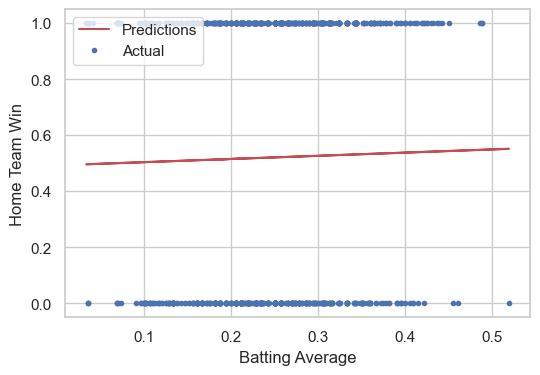

In [67]:
plt.figure(figsize=(6,4))
plt.plot(x_test, y_pred, "r-", label="Predictions")
plt.plot(x_test, y_test, "b.", label="Actual")
plt.xlabel("Batting Average")
plt.ylabel("Home Team Win")
plt.legend(loc="upper left")
plt.show()